In [3]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal

import gw_plotting

import matplotlib.pyplot as plt

plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('mathtext', fontset='stix')
plt.rc('font', family='STIXGeneral')
plt.rc('font', size=15)
plt.rc('figure', autolayout=True)
plt.rc('axes', titlesize=16, labelsize=17)
plt.rc('lines', linewidth=2, markersize=6)
plt.rc('legend', fontsize=15)
plt.rc('figure')

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Fisher Exercise

In [6]:
import numpy as np
import pandas as pd

def generate_samples(mean, covariance, num_samples, columns_name):
    """
    Generate random samples from a multivariate normal distribution.

    :param mean: Mean vector of the distribution (as a dictionary).
    :param covariance: Covariance matrix of the distribution.
    :param num_samples: Number of samples to generate.
    :param columns_name: Names of the columns for the DataFrame.
    :return: A DataFrame with the generated samples.
    """

    # Flatten the dictionary values to create a 1D mean array
    mean_array = np.array([value[0] for value in mean.values()])

    # Generate samples and create DataFrame
    return pd.DataFrame(np.random.multivariate_normal(mean_array, covariance, num_samples), columns=columns_name)

# Example usage
mean = {
    'para_1': np.array([67.0]),
    'para_2': np.array([0.02]),
    'para_3': np.array([15])
}

covariance = [[1,0,55],[0,2,0],[0,0,3]]
num_samples = 100000  # Number of samples to generate

paraSample = generate_samples(mean, covariance, num_samples, ['para_1', 'para_2', 'para_3'])


/tmp/ipykernel_3561673/1580932638.py:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return pd.DataFrame(np.random.multivariate_normal(mean_array, covariance, num_samples), columns=columns_name)


/home/jshterenberg/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/jshterenberg/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


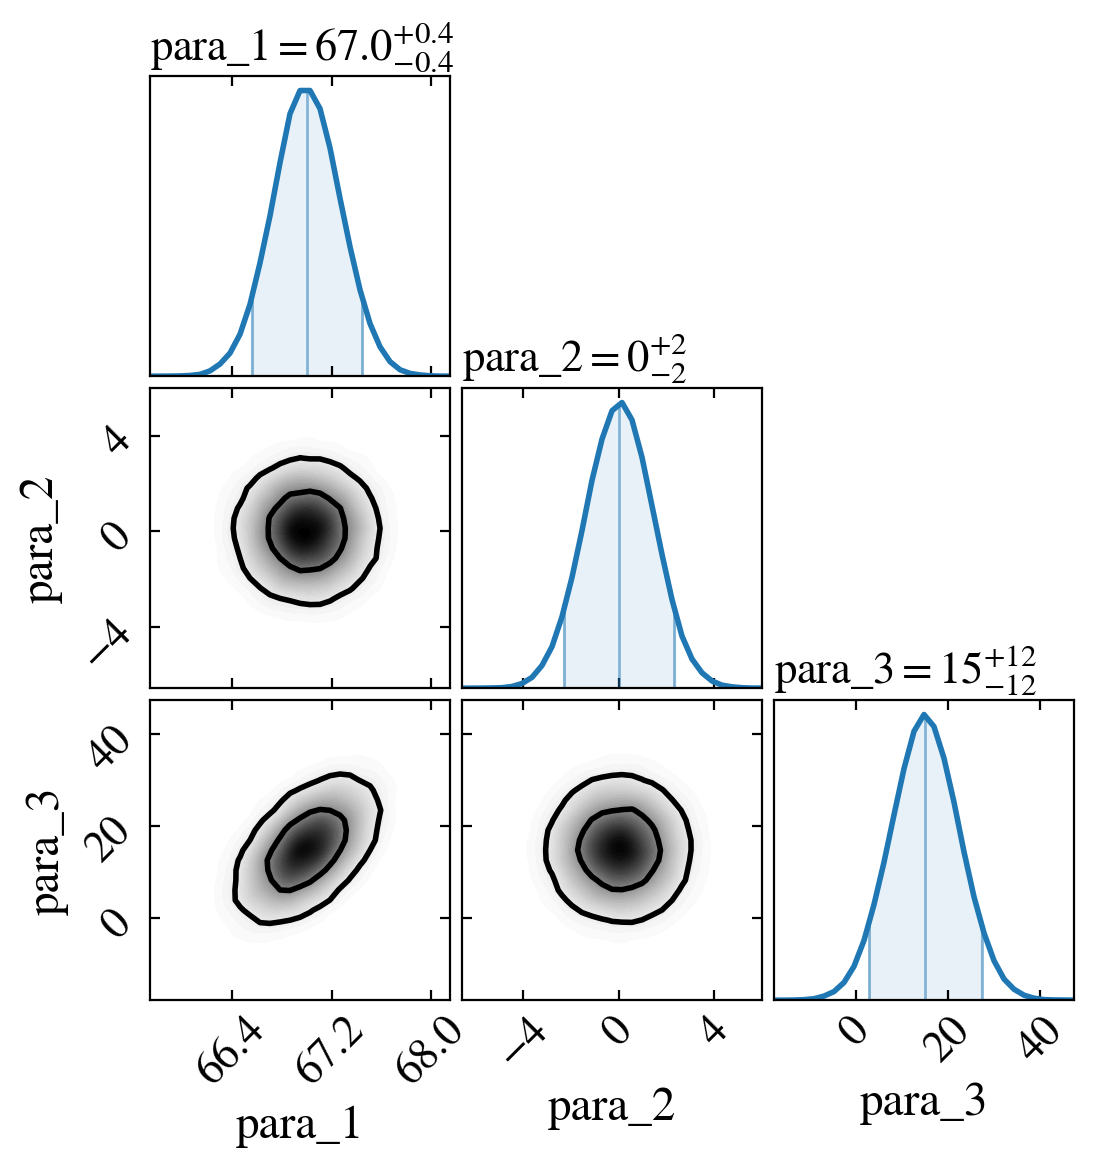

In [8]:
plot_params = ['para_1','para_2','para_3']

average_plot = gw_plotting.CornerPlot(paraSample,bins=30).plot()

## Play With PSD

In [9]:
# Load general package

import os
import sys

import copy
import numpy as np
from astropy.cosmology import Planck18

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)

In [10]:


import gwfast.gwfastGlobals as glob

In [11]:
from legwork import source, psd

from astropy import units as u

# Your frequency data
lisa_freq = np.linspace(1e-5,10.0,100000) * u.Hz

# Now, call the function with this Quantity
lisa_asd = np.sqrt((psd.lisa_psd(lisa_freq) * u.Hz))



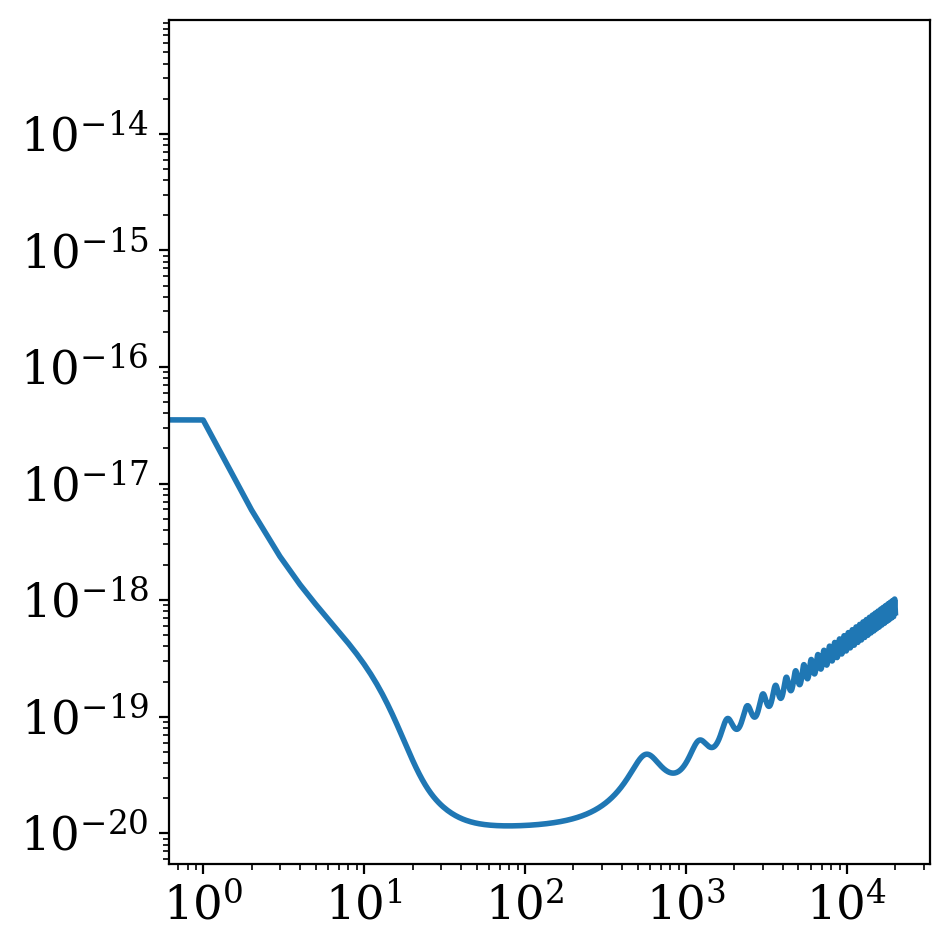

In [12]:
plt.figure(figsize=(5,5))
plt.plot([float(i) for i in lisa_asd])
plt.yscale('log')
plt.xscale('log')
plt.show()

In [13]:
# Function to load ASD

def load_asd(file_path):
    # Load the data into a DataFrame
    df = pd.read_csv(file_path, sep="\s+", header=None, names=['freq', 'asd'])
    return df


In [14]:
# All Detectors
alldetectors = copy.deepcopy(glob.detectors)
print('All available detectors are: '+str(list(alldetectors.keys())))

# LV Detectors
LVdetectors = {det:alldetectors[det] for det in ['L1', 'H1', 'Virgo']}
print('Using detectors '+str(list(LVdetectors.keys())))

# Future Detectors
Futuredetectors = {det:alldetectors[det] for det in ['ETS', 'ETMR', 'CE1Id','CE2NM']}

All available detectors are: ['L1', 'H1', 'Virgo', 'KAGRA', 'LIGOI', 'ETS', 'ETMR', 'ETSL', 'ETMRL45d', 'ETMRLpar', 'CE1Id', 'CE2NM', 'CE2NSW']
Using detectors ['L1', 'H1', 'Virgo']


In [15]:
# We use the O3 (run 3) psds
LVdetectors['L1']['asd_path'] = os.path.join(glob.detPath, 'LVC_O1O2O3', 'O3-L1-C01_CLEAN_SUB60HZ-1240573680.0_sensitivity_strain_asd.txt')
LVdetectors['H1']['asd_path'] = os.path.join(glob.detPath, 'LVC_O1O2O3', 'O3-H1-C01_CLEAN_SUB60HZ-1251752040.0_sensitivity_strain_asd.txt')
LVdetectors['Virgo']['asd_path'] = os.path.join(glob.detPath, 'LVC_O1O2O3', 'O3-V1_sensitivity_strain_asd.txt')

# psds for future detectors
Futuredetectors['ETS']['asd_path'] = os.path.join(glob.detPath, 'ET_designs_comparison_paper/HFLF_cryo', 'ETLength15km.txt')
Futuredetectors['ETMR']['asd_path'] = os.path.join(glob.detPath, 'ET_designs_comparison_paper/HFLF_cryo', 'ETLength20km.txt')
Futuredetectors['CE1Id']['asd_path'] = os.path.join(glob.detPath, 'ce_strain', 'cosmic_explorer.txt')
Futuredetectors['CE2NM']['asd_path'] = os.path.join(glob.detPath, 'ce_strain', 'cosmic_explorer_20km.txt')

# Load asd
L1_asd =load_asd(LVdetectors['L1']['asd_path'])
H1_asd =load_asd(LVdetectors['H1']['asd_path'])
Virgo_asd =load_asd(LVdetectors['Virgo']['asd_path'])

ETS_asd=load_asd(Futuredetectors['ETS']['asd_path'])
ETMR_asd=load_asd(Futuredetectors['ETMR']['asd_path'])
CE1Id_asd=load_asd(Futuredetectors['CE1Id']['asd_path'])
CE2NM_asd=load_asd(Futuredetectors['CE2NM']['asd_path'])

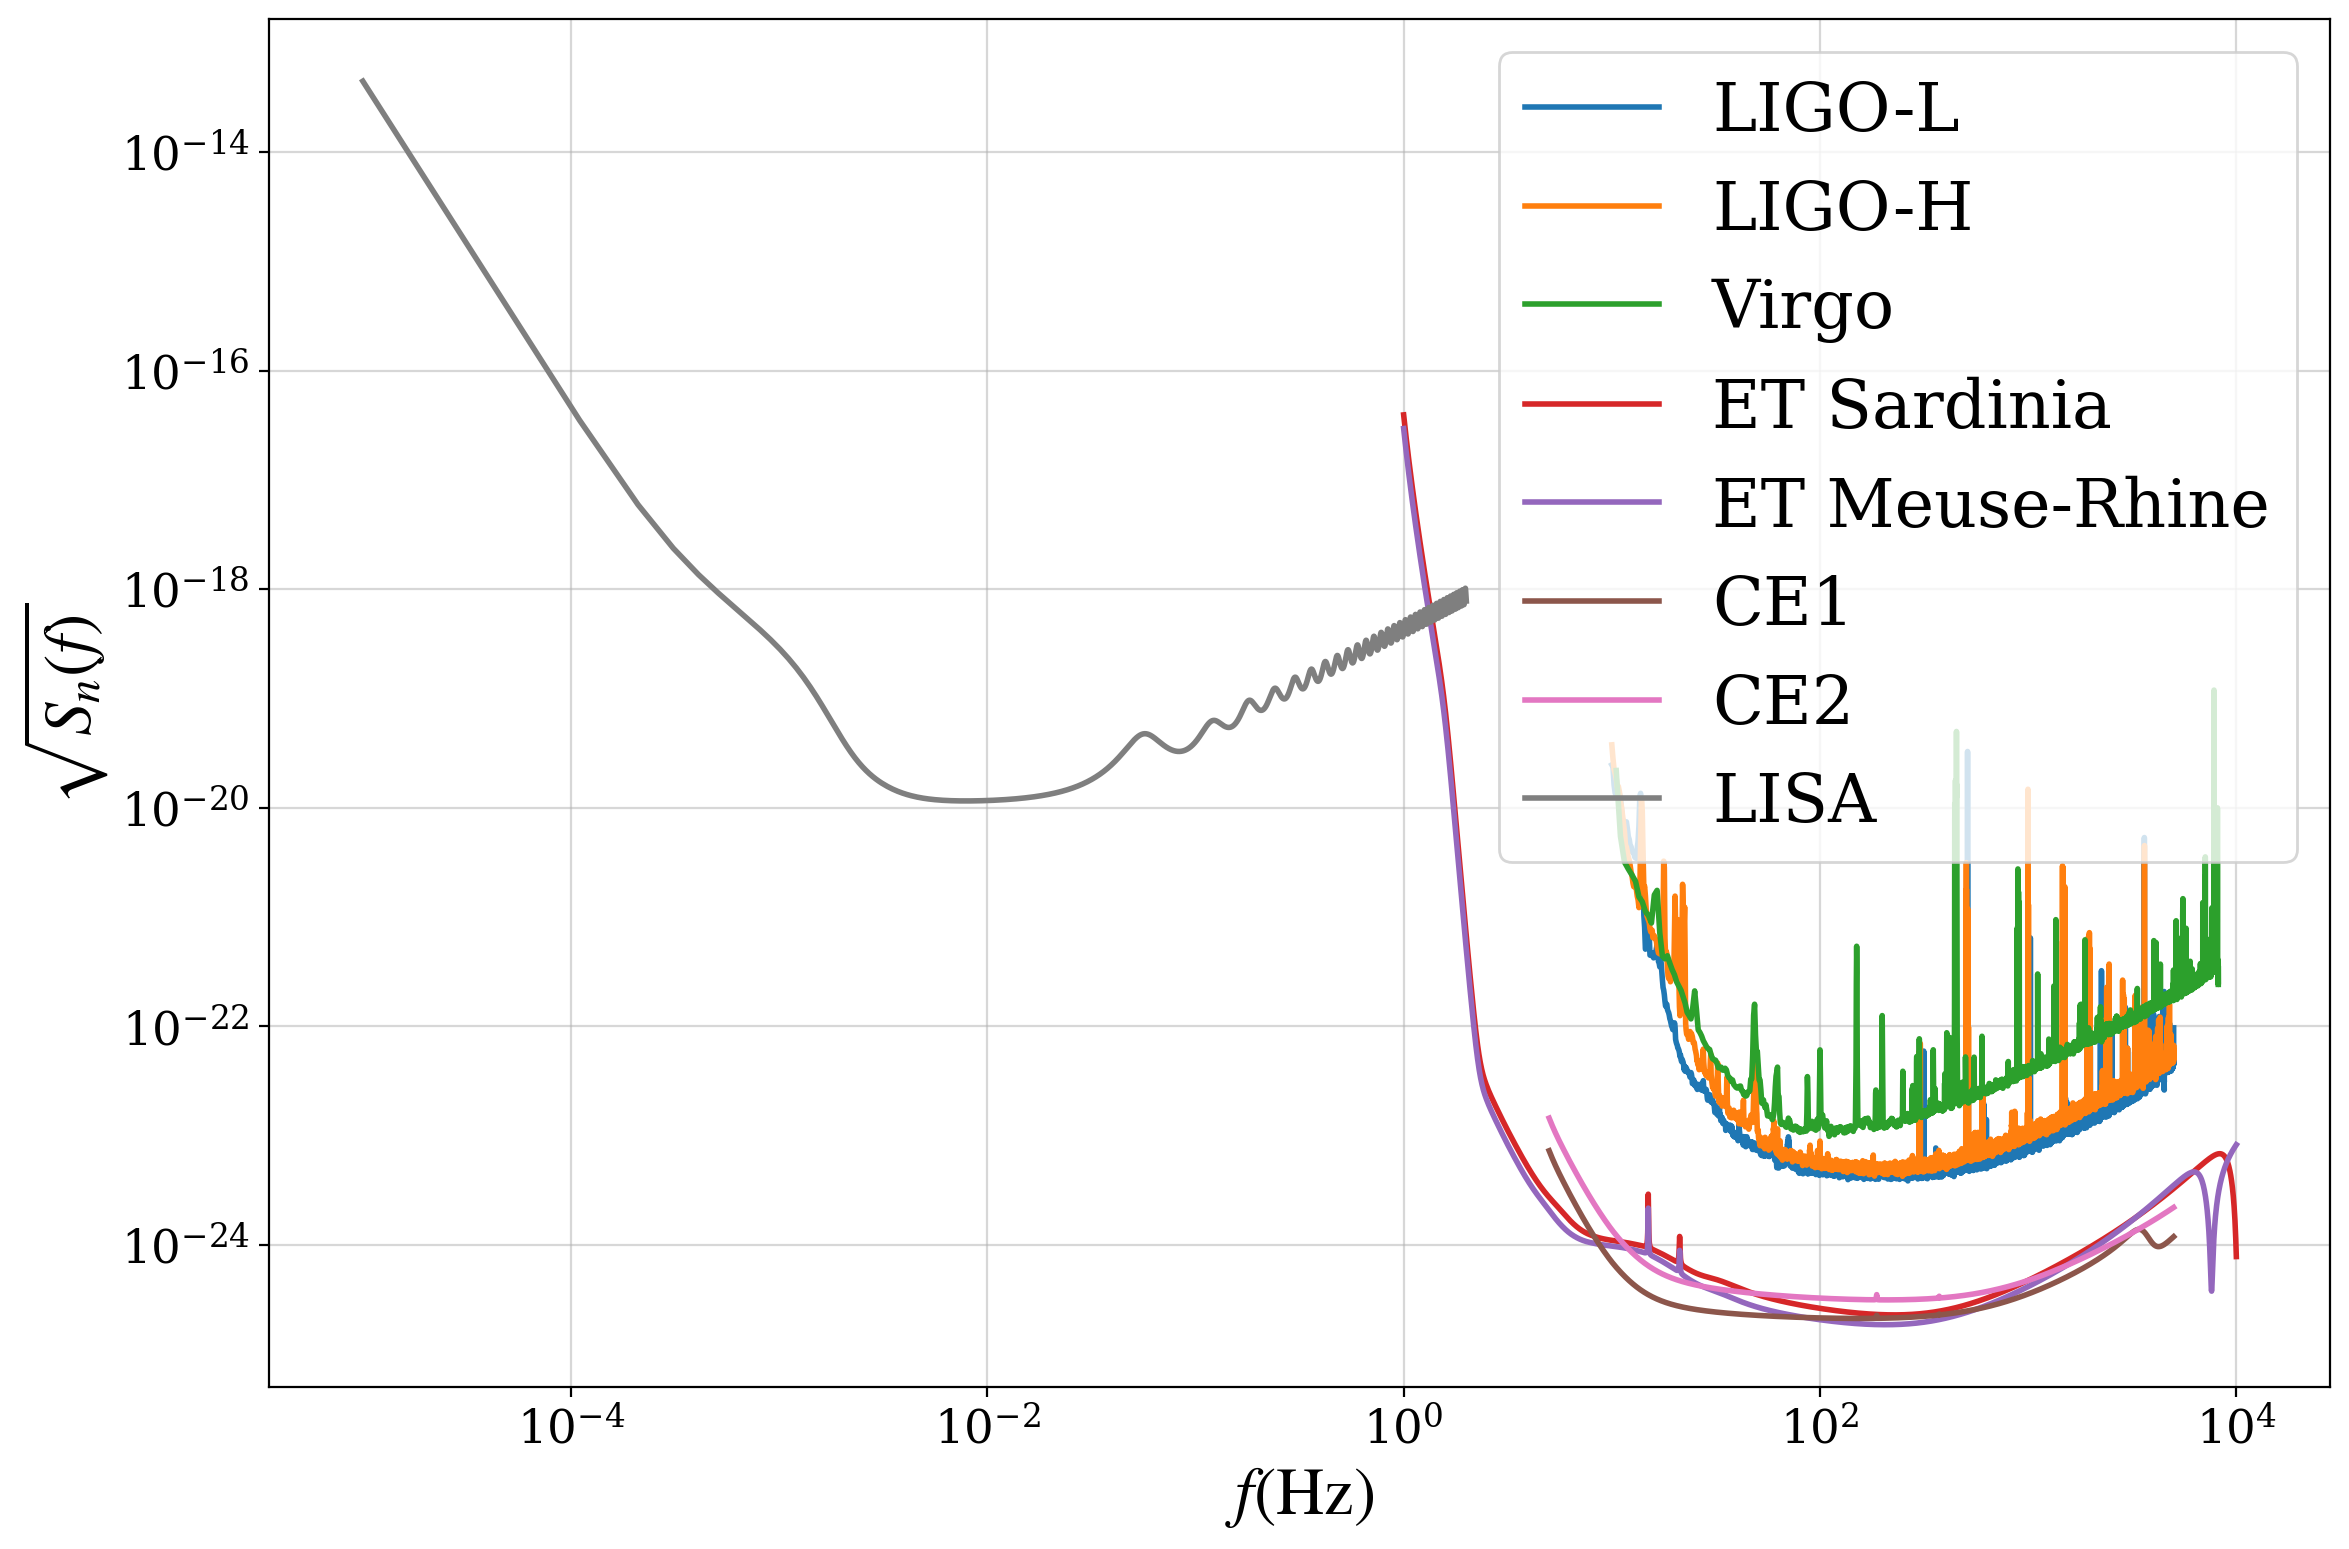

In [16]:
# Plot asd

plt.plot(L1_asd['freq'], L1_asd['asd'],label = 'LIGO-L')
plt.plot(H1_asd['freq'], H1_asd['asd'], label = 'LIGO-H')
plt.plot(Virgo_asd['freq'][Virgo_asd['freq']>10], Virgo_asd['asd'][Virgo_asd['freq']>10], label = 'Virgo')

plt.plot(ETS_asd['freq'],ETS_asd['asd'], label = 'ET Sardinia')
plt.plot(ETMR_asd['freq'],ETMR_asd['asd'], label = 'ET Meuse-Rhine')
plt.plot(CE1Id_asd['freq'],CE1Id_asd['asd'], label = 'CE1')
plt.plot(CE2NM_asd['freq'],CE2NM_asd['asd'], label = 'CE2')

plt.plot(lisa_freq,lisa_asd, label = 'LISA')

plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=.5)
plt.xlabel(r'$f({\rm Hz})$')
plt.ylabel(r'$\sqrt{S_n(f)}$')
plt.legend()


confirms

## Fisher For Neutron Star Event

In [17]:
from gwfast.waveforms import IMRPhenomD_NRTidalv2, IMRPhenomD #inspiral-merge-ringdown, PhenomD model, Numerical Relativity Tidal model (v2)
from gwfast.signal import GWSignal
from gwfast.network import DetNet
from gwfast.fisherTools import CovMatr, compute_localization_region, check_covariance, fixParams, plot_contours
from gwfast.gwfastUtils import Lamt_delLam_from_Lam12

/home/jshterenberg/anaconda3/lib/python3.11/site-packages/gwfast/waveforms.py:33: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


TEOBResumS is not installed, only the GWFAST waveform models are available, namely: TaylorF2, IMRPhenomD, IMRPhenomD_NRTidalv2, IMRPhenomHM and IMRPhenomNSBH


In [18]:
myLVSignals = {}

for d in LVdetectors.keys():

    myLVSignals[d] = GWSignal(IMRPhenomD_NRTidalv2(),
                psd_path=LVdetectors[d]['asd_path'],
                detector_shape = LVdetectors[d]['shape'],
                det_lat= LVdetectors[d]['lat'],
                det_long=LVdetectors[d]['long'],
                det_xax=LVdetectors[d]['xax'],
                verbose=True,
                useEarthMotion = False,
                fmin=10.,
                IntTablePath=None)

myLVNet = DetNet(myLVSignals)

Using ASD from file /home/jshterenberg/anaconda3/lib/python3.11/site-packages/psds/LVC_O1O2O3/O3-L1-C01_CLEAN_SUB60HZ-1240573680.0_sensitivity_strain_asd.txt 
Initializing jax...
Jax local device count: 8
Jax  device count: 8
Using ASD from file /home/jshterenberg/anaconda3/lib/python3.11/site-packages/psds/LVC_O1O2O3/O3-H1-C01_CLEAN_SUB60HZ-1251752040.0_sensitivity_strain_asd.txt 
Initializing jax...
Jax local device count: 8
Jax  device count: 8
Using ASD from file /home/jshterenberg/anaconda3/lib/python3.11/site-packages/psds/LVC_O1O2O3/O3-V1_sensitivity_strain_asd.txt 
Initializing jax...
Jax local device count: 8
Jax  device count: 8


In [19]:
from gwfastUtils import GPSt_to_LMST

# Median values of the posterior samples for all the parameters,
# except psi and the coalescence phase that are set to 0

z = np.array([0.00980])
tGPS = np.array([1187008882.4])

GW170817 = {'Mc':np.array([1.1859])*(1.+z),
            'dL':Planck18.luminosity_distance(z).value/1000.,
            'theta':np.array([np.pi/2. + 0.4080839999999999]),
            'phi':np.array([3.4461599999999994]),
            'iota':np.array([2.545065595974997]),
            'psi':np.array([0.]),
            'tcoal':GPSt_to_LMST(tGPS, lat=0., long=0.), # GMST is LMST computed at long = 0°
            'eta':np.array([0.24786618323504223]),
            'Phicoal':np.array([0.]),
            'chi1z':np.array([0.005136138323169717]),
            'chi2z':np.array([0.003235146993487445]),
            'Lambda1':np.array([368.17802383555687]),
            'Lambda2':np.array([586.5487031450857])
           }

print('Parameters for GW170817 are:')
GW170817

Parameters for GW170817 are:


{'Mc': array([1.19752182]),
 'dL': array([0.04374755]),
 'theta': array([1.97888033]),
 'phi': array([3.44616]),
 'iota': array([2.5450656]),
 'psi': array([0.]),
 'tcoal': DeviceArray([0.43432288], dtype=float64),
 'eta': array([0.24786618]),
 'Phicoal': array([0.]),
 'chi1z': array([0.00513614]),
 'chi2z': array([0.00323515]),
 'Lambda1': array([368.17802384]),
 'Lambda2': array([586.54870315])}

In [20]:
SNR = myLVNet.SNR(GW170817)
print('SNR for GW170817 is %.2f to compare with 33'%SNR[0])

SNR for GW170817 is 46.35 to compare with 33


In [21]:
SNR

array([46.34693649])

In [22]:
# Compute Fisher Matrix
totF = myLVNet.FisherMatr(GW170817)

# Fisher matrix shape :math:`(N_{\\rm parameters}`, :math:`N_{\\rm parameters}`, :math:`N_{\\rm events})`
print('The computed Fisher matrix has shape %s'%str(totF.shape))

Computing Fisher for L1...
Computing derivatives...
Computing Fisher for H1...
Computing derivatives...
Computing Fisher for Virgo...
Computing derivatives...
Done.
The computed Fisher matrix has shape (13, 13, 1)


In [23]:
ParNums = IMRPhenomD_NRTidalv2().ParNums

newFish, newPars = fixParams(totF, ParNums, ['deltaLambda'])

print('Now the Fisher matrix has shape %s'%str(newFish.shape))

newCov, new_inversion_err = CovMatr(newFish)

_ = check_covariance(newFish, newCov)

Now the Fisher matrix has shape (12, 12, 1)
Inversion errors: [0.00140951]
diagonal-1 = [array([ 6.32414232e-10, -4.56925608e-11, -3.59124948e-13,  1.09101096e-13,
       -9.30608672e-14, -3.06967613e-13,  5.07454755e-13,  2.66085542e-10,
       -3.49040380e-11,  4.50107507e-09,  1.65360859e-07,  1.13454870e-11],
      dtype=float128)]
Max off diagonal: [0.0014095094520598649979]

mask: where F*S(off-diagonal)>1e-10 (--> problematic if True off diagonal)
[array([[ True, False, False, False, False, False, False, False, False,
        False, False, False],
       [False,  True, False, False, False, False, False, False, False,
         True, False, False],
       [ True, False,  True, False, False, False, False, False, False,
        False, False, False],
       [ True, False, False,  True, False, False, False, False, False,
        False, False, False],
       [ True, False, False, False,  True, False, False, False, False,
        False, False, False],
       [False,  True, False, False,

In [24]:
paraSample = generate_samples(mean, covariance, num_samples,['para_1','para_2','para_3'])


/tmp/ipykernel_3561673/1580932638.py:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return pd.DataFrame(np.random.multivariate_normal(mean_array, covariance, num_samples), columns=columns_name)


In [25]:

newCov_2d = [[item[0] for item in inner_list] for inner_list in newCov]



In [26]:
Lamt_delLam_from_Lam12(GW170817['Lambda1'],GW170817['Lambda2'],GW170817['eta'])


plot_mean = {'Mc':np.array([1.1859])*(1.+z),
            'dL':Planck18.luminosity_distance(z).value/1000.,
            'theta':np.array([np.pi/2. + 0.4080839999999999]),
            'phi':np.array([3.4461599999999994]),
            'iota':np.array([2.545065595974997]),
            'psi':np.array([0.]),
            'tcoal':GPSt_to_LMST(tGPS, lat=0., long=0.), # GMST is LMST computed at long = 0°
            'eta':np.array([0.24786618323504223]),
            'Phicoal':np.array([0.]),
            'chi1z':np.array([0.005136138323169717]),
            'chi2z':np.array([0.003235146993487445]),
            'Lambdat':np.array([456.21632068]),
           }



/home/jshterenberg/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/jshterenberg/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


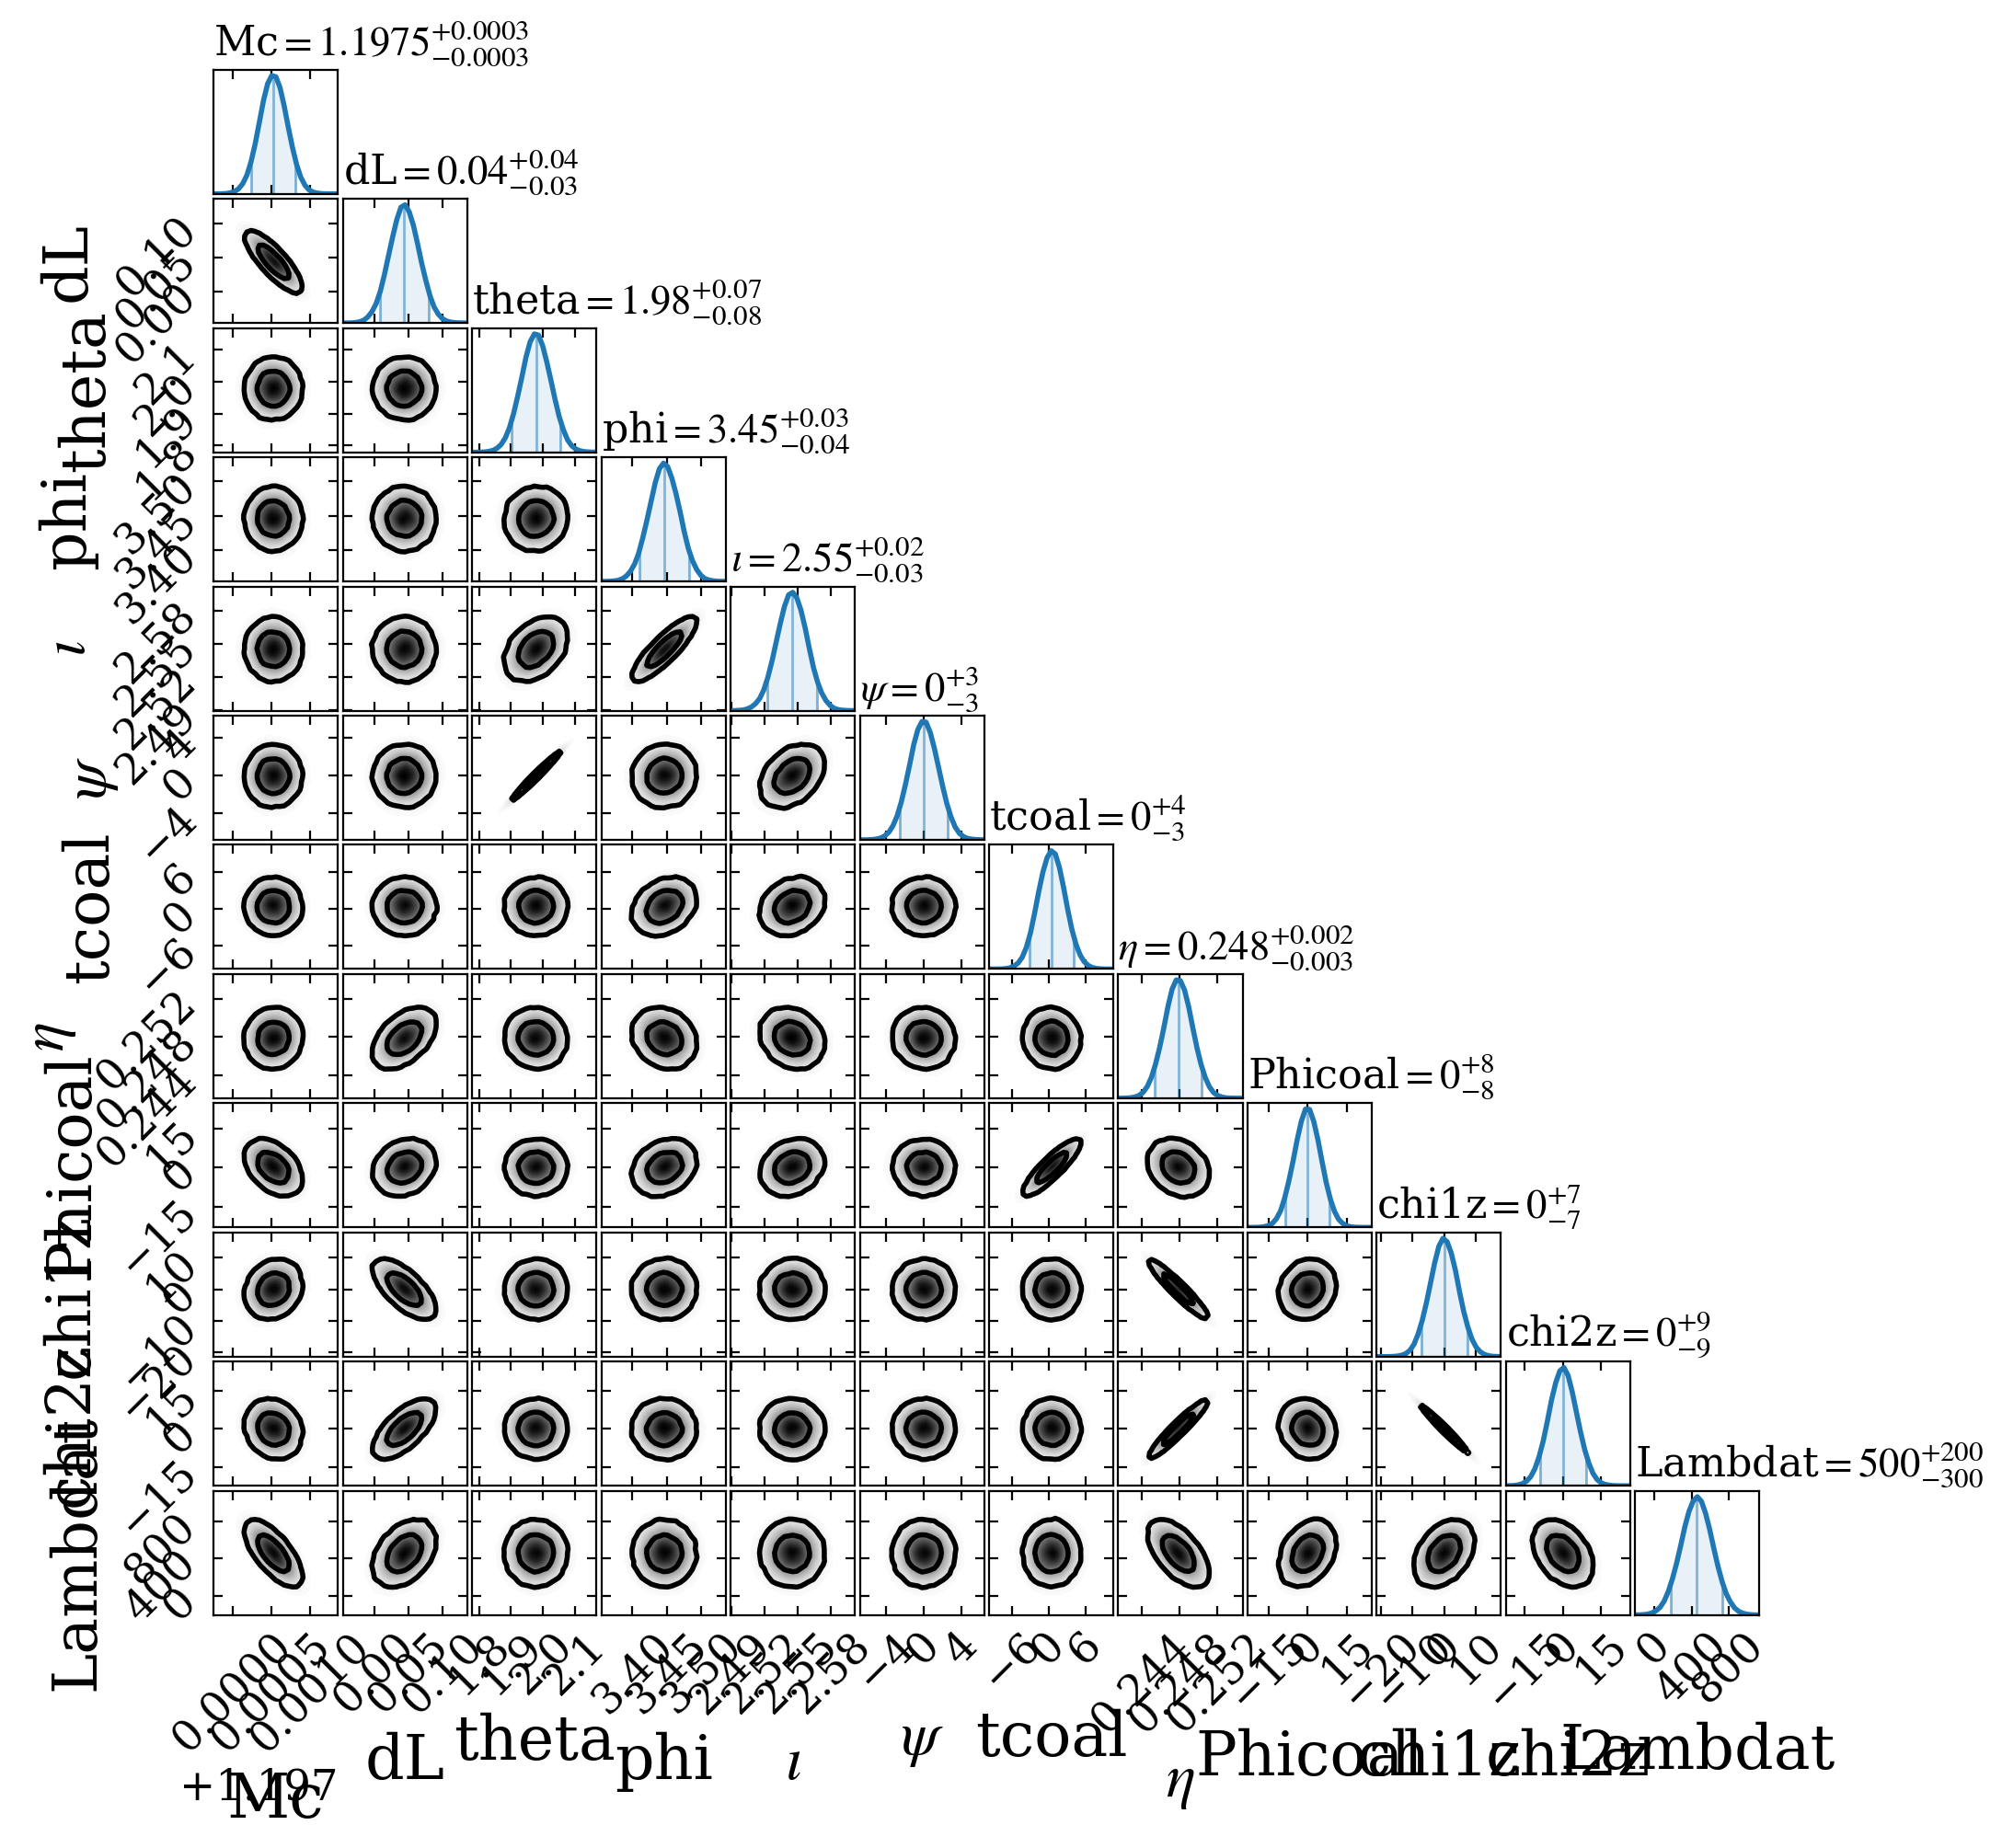

In [27]:
paraSample = generate_samples(plot_mean, newCov_2d, 100000,plot_mean.keys())


average_plot = gw_plotting.CornerPlot(paraSample,bins=30).plot()


In [28]:
newFish

array([[[ 5.95627750e+12],
        [-8.87221816e+10],
        [-3.32075754e+04],
        [-5.45356010e+08],
        [-8.49350565e+08],
        [ 7.59349440e+05],
        [-2.29883512e+08],
        [-8.62293322e+10],
        [ 1.12999393e+08],
        [-2.72357795e+10],
        [-2.17255289e+10],
        [-5.17135528e+04]],

       [[-8.87221816e+10],
        [ 1.35714701e+09],
        [-6.68722379e+03],
        [ 9.15186931e+06],
        [ 1.38448690e+07],
        [-1.05837925e+04],
        [ 3.40307159e+06],
        [ 1.42914570e+09],
        [-1.67276757e+06],
        [ 4.12802582e+08],
        [ 3.29235533e+08],
        [ 9.26226153e+02]],

       [[-3.32075754e+04],
        [-6.68722379e+03],
        [ 1.12236601e+06],
        [-1.14976648e+04],
        [-2.21000796e+04],
        [-3.31949411e+04],
        [-1.87416110e+02],
        [ 1.60716314e+00],
        [-4.39248541e-14],
        [-4.95007468e+02],
        [-3.95944468e+02],
        [ 5.79097577e-02]],

       [[-5.45356010e+